In [1]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
import cv2

In [2]:
X_train = []
Y_train = []
image_size = 256
labels = ['normal','ulcerative_colitis','polyps','esophagitis']


for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/Colab Notebooks/Project/Data/train',i)
    print(folderPath)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
# for i in labels:
#     folderPath = os.path.join(r'/content/drive/MyDrive/Colab Notebooks/Project/Data/test',i)
#     print(folderPath)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         img = cv2.resize(img,(image_size,image_size))
#         X_train.append(img/255)
#         Y_train.append(i)

# for i in labels:
#     folderPath = os.path.join(r'/content/drive/MyDrive/Colab Notebooks/Project/Data/val',i)
#     print(folderPath)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         img = cv2.resize(img,(image_size,image_size))
#         X_train.append(img/255)
#         Y_train.append(i)


/content/drive/MyDrive/Colab Notebooks/Project/Data/train/normal
/content/drive/MyDrive/Colab Notebooks/Project/Data/train/ulcerative_colitis
/content/drive/MyDrive/Colab Notebooks/Project/Data/train/polyps
/content/drive/MyDrive/Colab Notebooks/Project/Data/train/esophagitis


In [3]:
print(X_train[2])
print(Y_train[2])

[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  2   2   2]
  [  2   2   2]
  [  2   2   2]]

 ...

 [[120 135  71]
  [127 155  33]
  [129 161  16]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[119 131  75]
  [126 150  39]
  [128 157  22]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 75  81  50]
  [ 81  94  32]
  [ 82 102  24]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
normal


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train  ,Y_train,test_size=0.1,)

In [5]:
import tensorflow as tf
y_train_new = []
for i in Y_train:
    y_train_new.append(labels.index(i))
Y_train=y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

y_test_new = []
for i in Y_test:
    y_test_new.append(labels.index(i))
Y_test = y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [6]:
print(type(Y_train))
print(type(Y_test))
X_train = np.array(X_train)
X_test = np.array(X_test)

print(type(X_train))
print(type(X_test))
print(Y_train)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


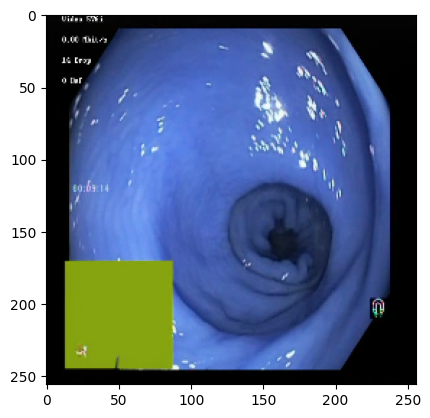

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.imshow(X_train[200])

### VGG16 Implementation

In [10]:
model_VGG16 = Sequential()
model_VGG16.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(256,256,3)))
model_VGG16.add(Conv2D(64,(3,3),activation='relu'))
model_VGG16.add(MaxPooling2D(2,2))
model_VGG16.add(Dropout(0.3))
model_VGG16.add(Conv2D(64,(3,3),activation='relu'))
model_VGG16.add(Conv2D(64,(3,3),activation='relu'))
model_VGG16.add(Dropout(0.3))
model_VGG16.add(MaxPooling2D(2,2))
model_VGG16.add(Dropout(0.3))
model_VGG16.add(Conv2D(128,(3,3),activation='relu'))
model_VGG16.add(Conv2D(128,(3,3),activation='relu'))
model_VGG16.add(Conv2D(128,(3,3),activation='relu'))
model_VGG16.add(MaxPooling2D(2,2))
model_VGG16.add(Dropout(0.3))
model_VGG16.add(Conv2D(128,(3,3),activation='relu'))
model_VGG16.add(Conv2D(256,(3,3),activation='relu'))
model_VGG16.add(MaxPooling2D(2,2))
model_VGG16.add(Dropout(0.3))
model_VGG16.add(Flatten())
model_VGG16.add(Dense(512,activation = 'relu'))
model_VGG16.add(Dense(512,activation = 'relu'))
model_VGG16.add(Dropout(0.3))
model_VGG16.add(Dense(4,activation='softmax'))

model_VGG16.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 252, 252, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 55, 55, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 23, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,049,284 (65.04 MB)

 Trainable params: 17,049,284 (65.04 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:

history = model_VGG16.fit(X_train, Y_train, batch_size=30, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 556ms/step - accuracy: 0.3377 - loss: 16.2102 - val_accuracy: 0.4383 - val_loss: 1.2561
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - accuracy: 0.6894 - loss: 0.7975 - val_accuracy: 0.8796 - val_loss: 0.3267
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.8693 - loss: 0.3307 - val_accuracy: 0.9383 - val_loss: 0.2800
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.9121 - loss: 0.2475 - val_accuracy: 0.9259 - val_loss: 0.3582
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - accuracy: 0.9249 - loss: 0.2124 - val_accuracy: 0.9660 - val_loss: 0.1731
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.9814 - loss: 0.0790 - val_accuracy: 0.9722 - val_loss: 0.2140
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.9746 - loss: 0.0994 - val_accuracy: 0.9321 - val_loss: 0.2528
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.9845 - loss: 0.0595 - val_acc

In [13]:
model_VGG16.evaluate(X_test,Y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.9856 - loss: 0.0666


[0.08972742408514023, 0.9783950448036194]

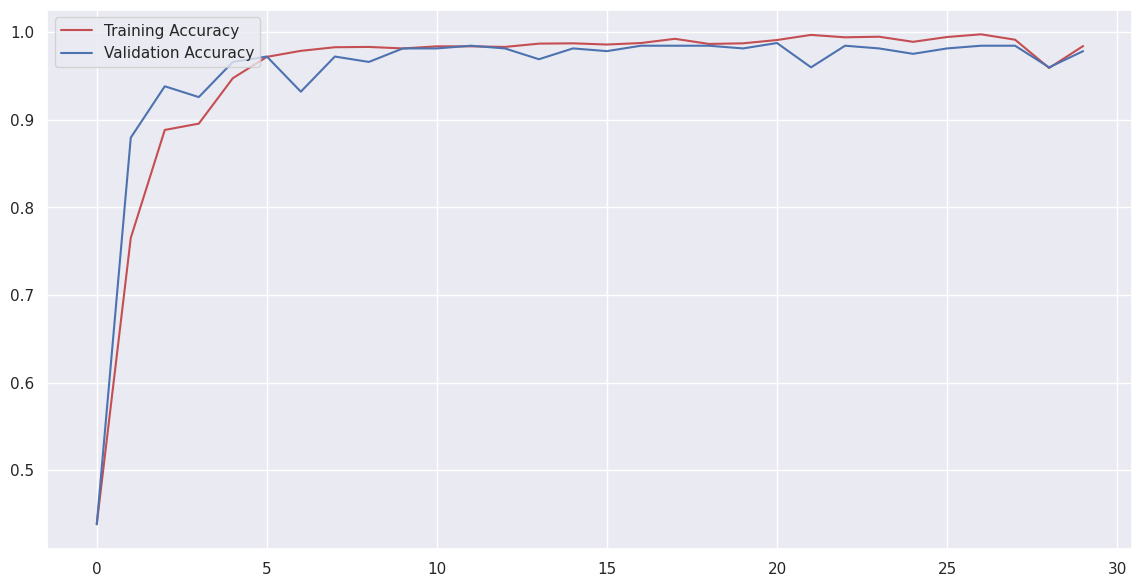

In [14]:
#model.save('braintumor.h5')
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

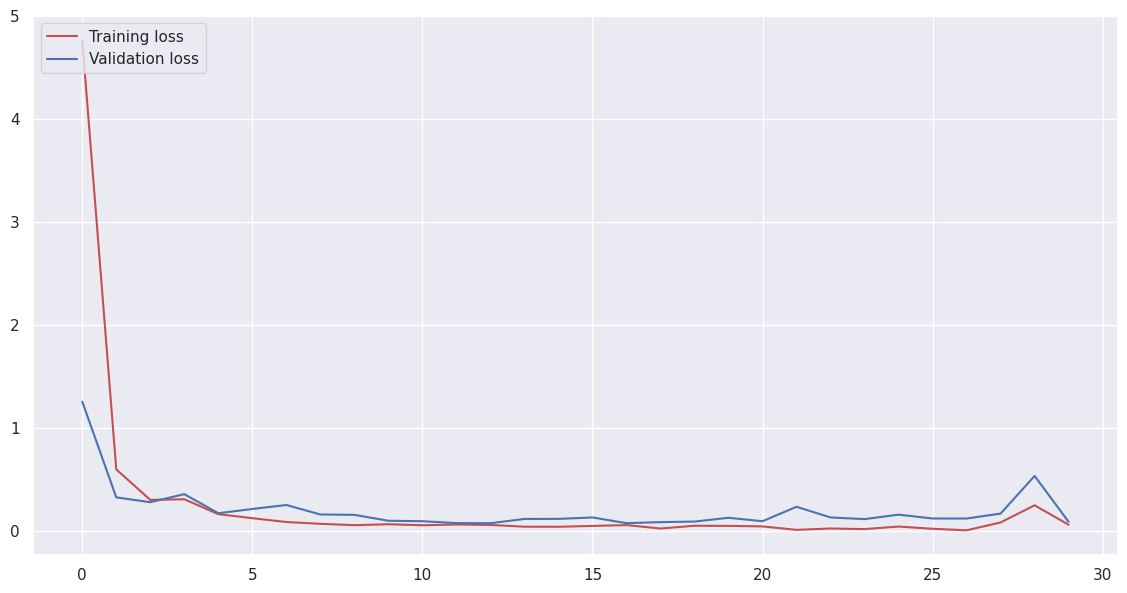

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

## VGG16 keras model implementation

In [8]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.optimizers import Adam

input_shape = (256, 256, 3)

# Define the VGG16 architecture manually
inputs = Input(shape=input_shape)

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Custom top layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)  # Adjust the number of units as per your requirement

# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     134,221,824 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 165,734,212 (632.23 MB)

 Trainable params: 165,734,212 (632.23 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, Y_train, batch_size=30, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.3568 - loss: 277.6388 - val_accuracy: 0.6358 - val_loss: 2.3447
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 586ms/step - accuracy: 0.7497 - loss: 0.9856 - val_accuracy: 0.8580 - val_loss: 0.5168
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 586ms/step - accuracy: 0.8896 - loss: 0.3254 - val_accuracy: 0.9568 - val_loss: 0.1803
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 585ms/step - accuracy: 0.9848 - loss: 0.0658 - val_accuracy: 0.9784 - val_loss: 0.1275
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 574ms/step - accuracy: 0.9915 - loss: 0.0356 - val_accuracy: 0.9784 - val_loss: 0.1079
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 585ms/step - accuracy: 0.9899 - loss: 0.0293 - val_accuracy: 0.9877 - val_loss: 0.0840
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 574ms/step - accuracy: 0.9913 - loss: 0.0433 - val_accuracy: 0.9012 - val_loss: 0.8405
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 573ms/step - accuracy: 0.8781 - loss: 42.7593 - val_acc

In [10]:
model.evaluate(X_test,Y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 779ms/step - accuracy: 0.9838 - loss: 0.1551


[0.12043890357017517, 0.9876543283462524]

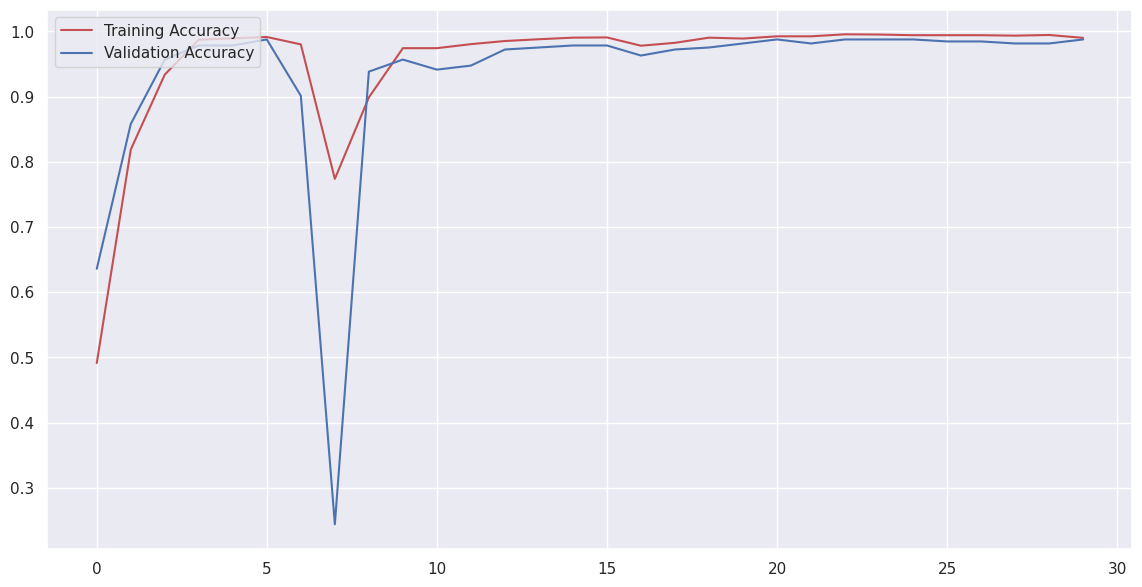

In [18]:
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

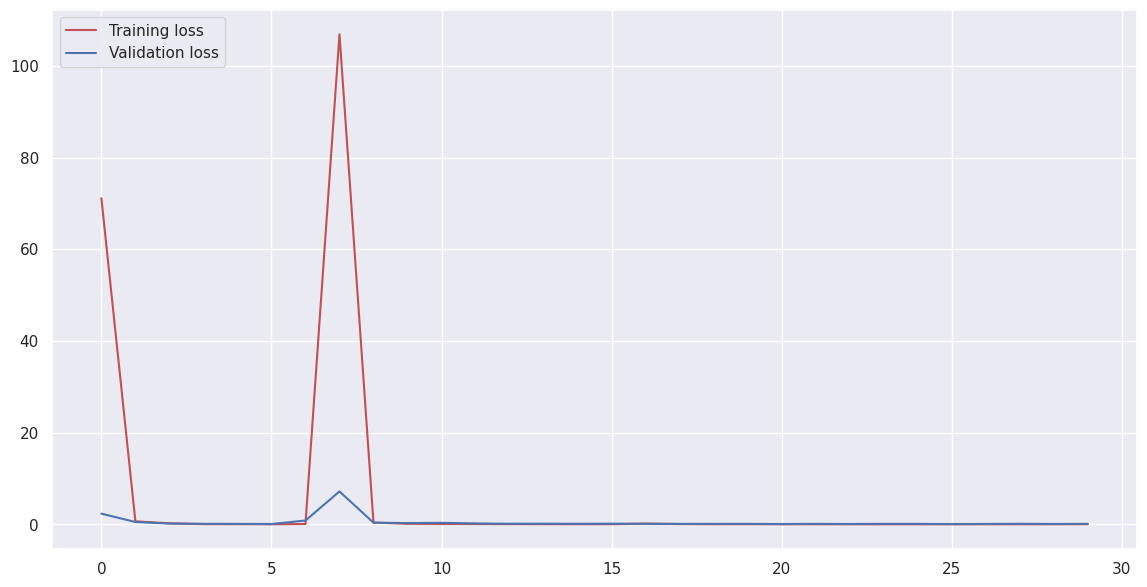

In [17]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training loss")
plt.plot(epochs,val_acc,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()